In [35]:
# importer les packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
import pickle

In [36]:
#importer et lire la base de données
df=pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [37]:
# voir les valeurs manquantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [38]:
df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [39]:
df.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [40]:
# Renseigner les valeurs manquantes
cat_data=[]
num_data=[]
for i,c in enumerate(df.dtypes):
  if c==object:
    cat_data.append(df.iloc[:,i])
  else:
    num_data.append(df.iloc[:,i])
cat_data=pd.DataFrame(cat_data).transpose()
num_data=pd.DataFrame(num_data).transpose()

In [41]:
# Pour les variables catégoriques on va remplaczr les valeurs manquantes par les valeurs qui se repetent le plus
cat_data=cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
cat_data.isnull().sum().any()

False

In [42]:
# Pour les variables numériques on va remplacer les valeurs manquantes par la valeur précedente de la meme colonne
num_data.fillna(method='bfill',inplace=True)
num_data.isnull().sum().any()

False

In [43]:
# Tranformer la colonne target
target_value={'Y':1,'N':0}
target=cat_data['Loan_Status']
cat_data.drop('Loan_Status',axis=1,inplace=True)
target=target.map(target_value)
target

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [44]:
# Remplacer les valeurs catégoriques par des valeurs numérique 0,1,2...
le=LabelEncoder()
for i in cat_data:
  cat_data[i]=le.fit_transform(cat_data[i])
cat_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,0,1,0,0,0,0,2
1,1,1,1,1,0,0,0
2,2,1,1,0,0,1,2
3,3,1,1,0,1,0,2
4,4,1,0,0,0,0,2
...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,0
610,610,1,1,3,0,0,0
611,611,1,1,1,0,0,2
612,612,1,1,2,0,0,2


In [45]:
# Supprimer loan_id
cat_data.drop('Loan_ID',axis=1,inplace=True)

In [46]:
# Concatener cat_Data et num_data et spécifier la colonne target
X=pd.concat([cat_data,num_data],axis=1)
y=target

In [47]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [48]:
target.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [49]:
# la base de données utilisée pour EDA
df=pd.concat([cat_data,num_data,target],axis=1)

le pourcentage des crédits accordés est: 0.3127035830618892
le pourcentage des crédits non accordés est: 0.6872964169381107


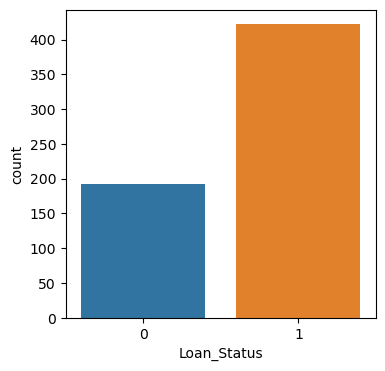

In [50]:
plt.figure(figsize=(4,4))
sns.countplot(x=target)
yes=target.value_counts()[0]/len(target)
no=target.value_counts()[1]/len(target)
print(f'le pourcentage des crédits accordés est: {yes}')
print(f'le pourcentage des crédits non accordés est: {no}')

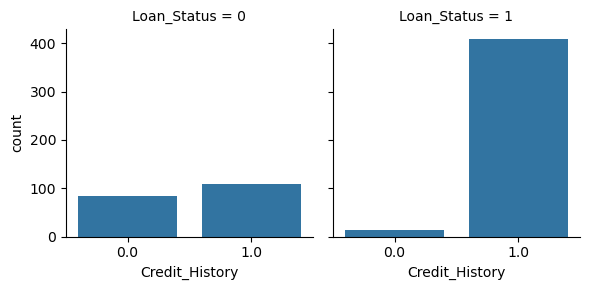

In [51]:
# Credit history 
grid=sns.FacetGrid(df,col='Loan_Status')
grid.map(sns.countplot,'Credit_History');

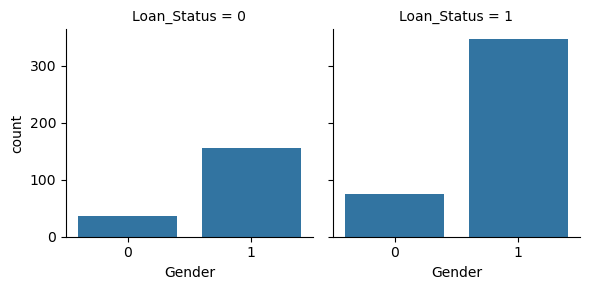

In [52]:
# Sexe
grid=sns.FacetGrid(df,col='Loan_Status')
grid.map(sns.countplot,'Gender');

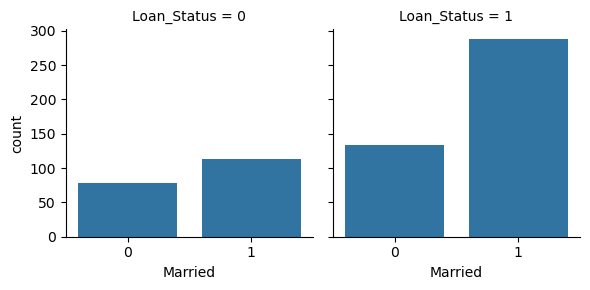

In [53]:
# Sexe
grid=sns.FacetGrid(df,col='Loan_Status')
grid.map(sns.countplot,'Married');

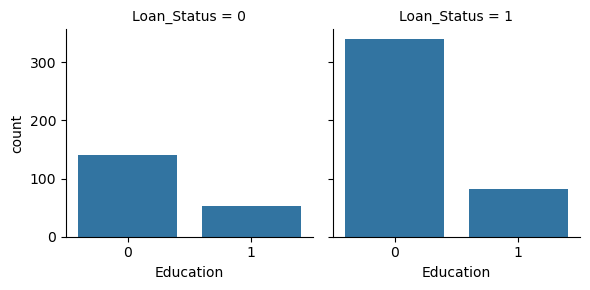

In [54]:
# Education
grid=sns.FacetGrid(df,col='Loan_Status')
grid.map(sns.countplot,'Education');

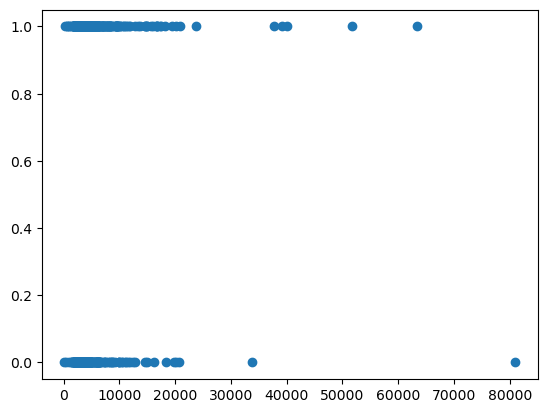

In [55]:
# revenu du demandeur
plt.scatter(df['ApplicantIncome'],df['Loan_Status']);

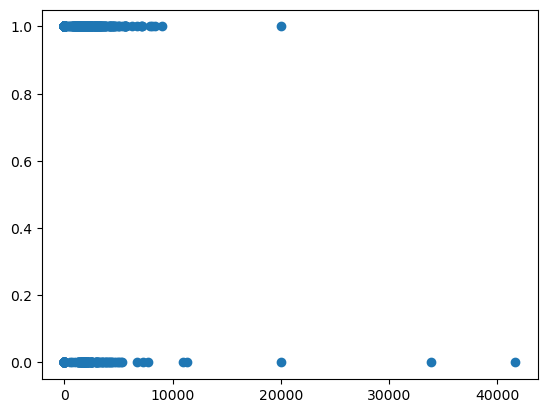

In [56]:
plt.scatter(df['CoapplicantIncome'],df['Loan_Status']);

In [57]:
df.groupby('Loan_Status').median()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,,,,,,,
0,1.0,1.0,0.0,0.0,0.0,1.0,3833.5,268.0,132.5,360.0,1.0
1,1.0,1.0,0.0,0.0,0.0,1.0,3812.5,1239.5,127.5,360.0,1.0


In [58]:
# Diviser la base de données en une base de données test et d'entrainement
sss=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=0)
for train,test in sss.split(X,y):
  X_train,X_test=X.iloc[train],X.iloc[test]
  y_train,y_test=y.iloc[train],y.iloc[test]

print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (491, 11)
X_test shape:  (123, 11)
y_train shape:  (491,)
y_test shape:  (123,)


In [59]:
# On va appliquer tois algorithmes Logisitic Regression, KNN, DecisionTree
models={
    'LogisticRegression':LogisticRegression(random_state=0),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(max_depth=1,random_state=0)
}

# fonction de précision
def accu(y_true,y_pred,retu=False):
  acc=accuracy_score(y_true,y_pred)
  if retu:
    return acc
  else:
    print(f'la precision du modèle est: {acc}')

# fonction d'application des modèles
def train_test_eval(models,X_train,y_train,X_test,y_test):
  for name,model in models.items():
    print(name,':')
    model.fit(X_train,y_train)
    accu(y_test,model.predict(X_test))
    print('-'*30)

train_test_eval(models,X_train,y_train,X_test,y_test)


LogisticRegression :
la precision du modèle est: 0.8048780487804879
------------------------------
KNeighborsClassifier :
la precision du modèle est: 0.5934959349593496
------------------------------
DecisionTreeClassifier :
la precision du modèle est: 0.8048780487804879
------------------------------


In [60]:
X_2=X[['Credit_History','Married','CoapplicantIncome']]

In [81]:
# Diviser la base de données en une base de données test et d'entrainement
sss=StratifiedShuffleSplit(n_splits=1, test_size=0.2,random_state=0)

for train,test in sss.split(X_2,y):
  X_train,X_test=X_2.iloc[train],X_2.iloc[test]
  y_train,y_test=y.iloc[train],y.iloc[test]

print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (491, 3)
X_test shape:  (123, 3)
y_train shape:  (491,)
y_test shape:  (123,)


In [82]:
train_test_eval(models,X_train,y_train,X_test,y_test)

LogisticRegression :
la precision du modèle est: 0.8130081300813008
------------------------------
KNeighborsClassifier :
la precision du modèle est: 0.7154471544715447
------------------------------
DecisionTreeClassifier :
la precision du modèle est: 0.8048780487804879
------------------------------


In [83]:
# Appliquer la regression logisitique sur notre base de donnée
Classifier=LogisticRegression()
Classifier.fit(X_2,y)

LogisticRegression()

In [84]:
# Enregistrer le modèle
pickle.dump(Classifier,open('model.pkl','wb'))